# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.




<img src="https://miro.medium.com/max/594/1*fDnVCDLv3a8tyxuZEWIS3w.png">

---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
#plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/NLP/Womens Clothing E-Commerce Reviews.csv")

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
df.shape

(23486, 11)

In [7]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
df.duplicated().any()

False

### Data Wrangling

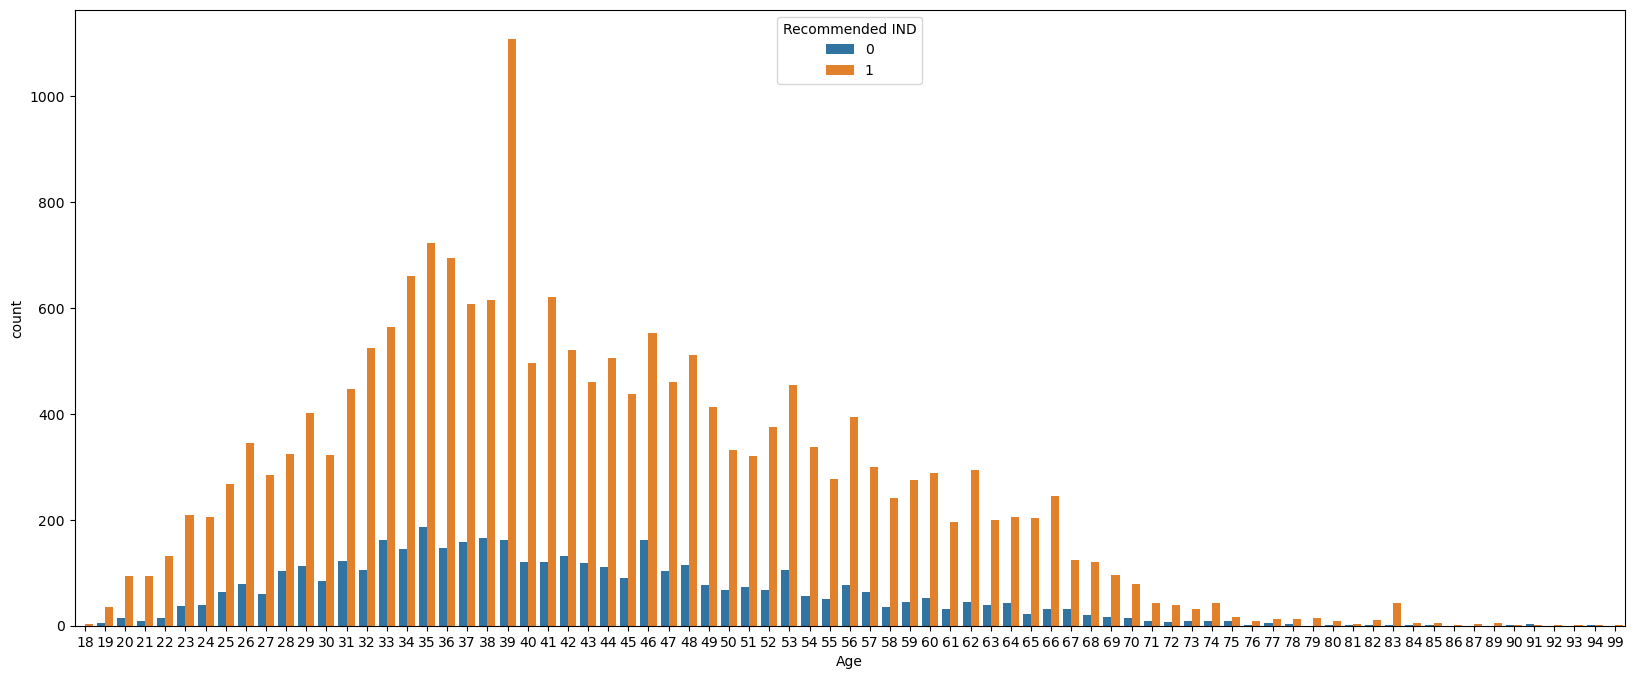

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data = df, x="Age" ,hue ="Recommended IND");


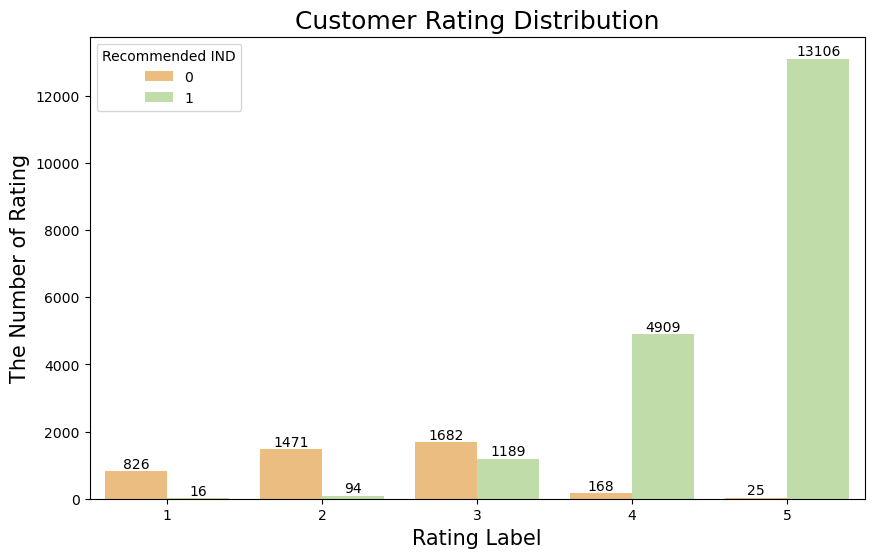

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND",  palette = 'Spectral')
plt.title('Customer Rating Distribution', fontsize=18)
plt.xlabel("Rating Label", fontsize=15)
plt.ylabel("The Number of Rating", fontsize=15)
for p in ax.containers:
    ax.bar_label(p)

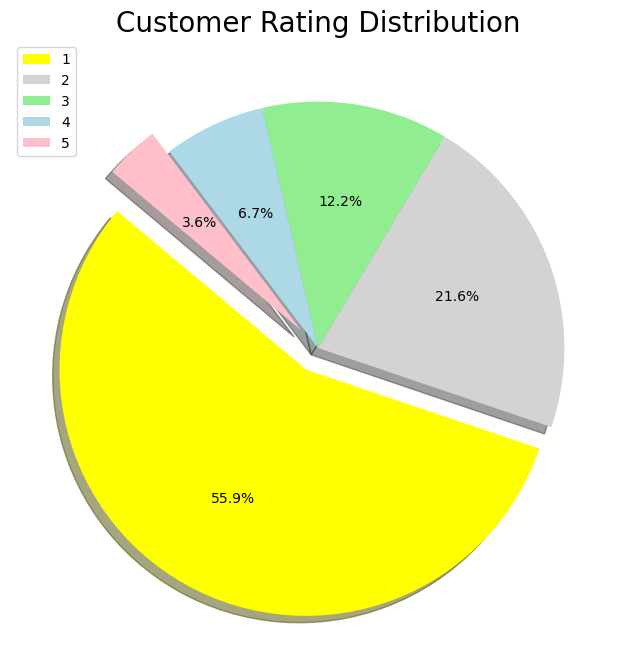

In [ ]:
plt.figure(figsize=(8, 8))

explode = [0.1, 0, 0, 0, 0.1]
plt.pie(df['Rating'].value_counts(), 
        explode=explode, 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140,
        colors=["yellow","liggray","lightgreen","lightblue","pink"]
       )
plt.legend(labels=['1', '2', '3', '4','5'])
plt.title('Customer Rating Distribution', fontsize=20)
plt.axis('off');

In [ ]:
df["Division Name"].value_counts(dropna=False)

General           13850
General Petite     8120
Initmates          1502
NaN                  14
Name: Division Name, dtype: int64

In [ ]:
df["Class Name"].value_counts(dropna=False)

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
NaN                 14
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

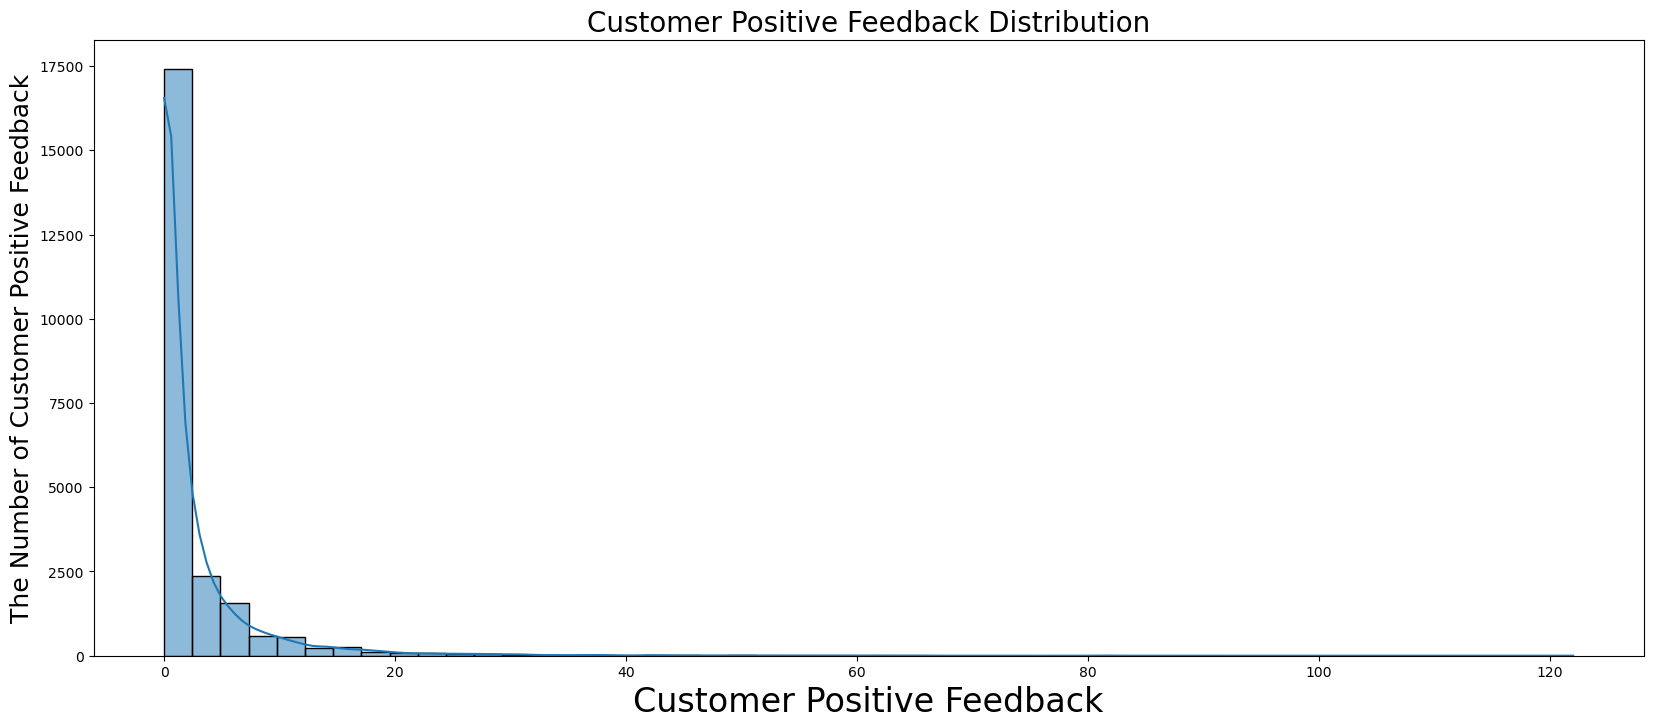

In [ ]:
plt.figure(figsize = (20, 8))
plt.title('Customer Positive Feedback Distribution', fontsize=20)
plt.xlabel("Customer Positive Feedback", fontsize=24)
plt.ylabel("The Number of Customer Positive Feedback", fontsize=18)

sns.histplot(df, x='Positive Feedback Count', kde = True, bins = 50);

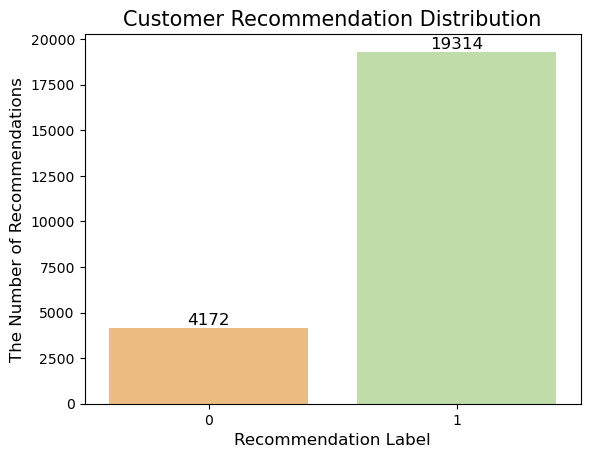

In [ ]:
ax = sns.countplot(df["Recommended IND"], palette ='Spectral')
ax.bar_label(ax.containers[0],size=12)
plt.title('Customer Recommendation Distribution', fontsize=15)
plt.xlabel("Recommendation Label", fontsize=12)
plt.ylabel("The Number of Recommendations", fontsize=12);

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

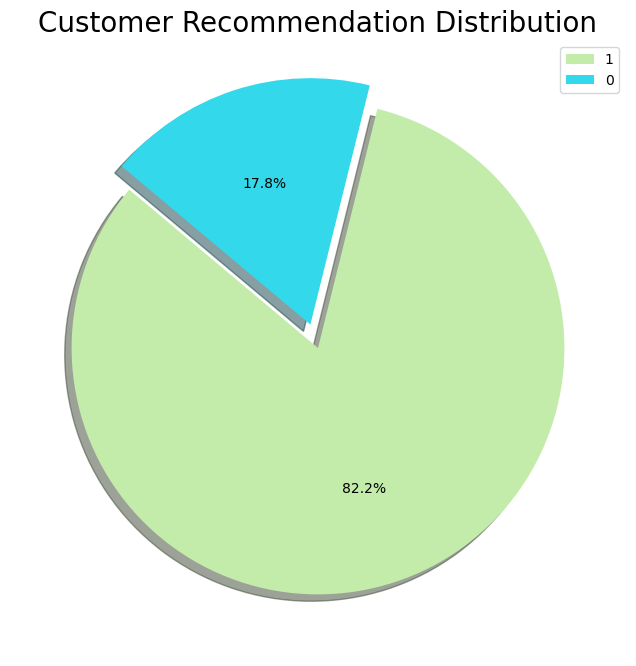

In [ ]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(
        df['Recommended IND'].value_counts(), 
        explode=explode, 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140,
        colors=["#c3eba9","#34d8eb"]
       )
plt.legend(labels=['1', '0'])
plt.title('Customer Recommendation Distribution', fontsize=20)
plt.axis('off');


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [8]:
df.rename(columns={"Review Text":"review_text", "Recommended IND":"label"}, inplace=True)

In [9]:
df1 = df[["review_text","label"]]
df1

,review_text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23481,I was very happy to snag this dress at such a ...,1
23482,"It reminds me of maternity clothes. soft, stre...",1
23483,"This fit well, but the top was very see throug...",0
23484,I bought this dress for a wedding i have this ...,1


---
---


### Missing Value Detection

In [ ]:
df1.isnull().sum()

review_text    845
label            0
dtype: int64

In [10]:
df1.dropna(inplace = True)

In [11]:
df1.reset_index(drop = True, inplace = True )

In [14]:
df1.head()

,review_text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


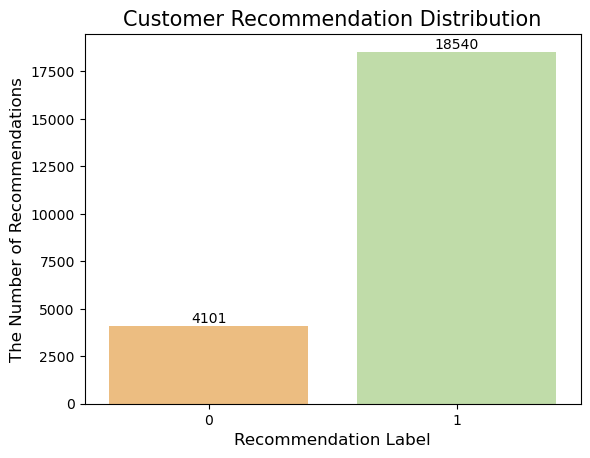

In [ ]:
ax = sns.countplot(df1["label"], palette ='Spectral')
plt.title('Customer Recommendation Distribution', fontsize=15)
plt.xlabel("Recommendation Label", fontsize=12)
plt.ylabel("The Number of Recommendations", fontsize=12)
for p in ax.containers:
    ax.bar_label(p)

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



In [15]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Tokenization, Noise Removal, Lexicon Normalization

In [16]:
stop_words = stopwords.words('english')

In [17]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S*', '', data).strip()
    data = re.sub('www\S*', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S*', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S*', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #9. joining
    return " ".join( text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [18]:
df1[df1["label"]==1]["review_text"]

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
6        I aded this in my basket at hte last mintue to...
                               ...                        
22635    So i wasn't sure about ordering this skirt bec...
22636    I was very happy to snag this dress at such a ...
22637    It reminds me of maternity clothes. soft, stre...
22639    I bought this dress for a wedding i have this ...
22640    This dress in a lovely platinum is feminine an...
Name: review_text, Length: 18540, dtype: object

In [19]:
positive_review=df1[df1["label"]==1]["review_text"]
positive_review=positive_review.apply(cleaning)
positive_review

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
22635    wasnt sure ordering skirt couldnt see person f...
22636    happy snag dress great price easy slip flatter...
22637    reminds maternity clothes soft stretchy shiny ...
22639    bought dress wedding summer cute unfortunately...
22640    dress lovely platinum feminine fit perfectly e...
Name: review_text, Length: 18540, dtype: object

In [ ]:
df1[df1["label"]==0]["review_text"]

2        I had such high hopes for this dress and reall...
5        I love tracy reese dresses, but this one is no...
10       Dress runs small esp where the zipper area run...
22       First of all, this is not pullover styling. th...
25       Loved the material, but i didnt really look at...
                               ...                        
22606    I tried these on because the color is really p...
22607    I wanted to love this jacket. so soft and grea...
22617    I purchased this for a very good price and i t...
22634    I was surprised at the positive reviews for th...
22638    This fit well, but the top was very see throug...
Name: review_text, Length: 4101, dtype: object

In [20]:
negative_review=df1[df1["label"]==0]["review_text"]
negative_review=negative_review.apply(cleaning)
negative_review

2        high hope dress really wanted work initially o...
5        love tracy reese dress one petite foot tall us...
10       dress run small esp zipper area run ordered sp...
22       first pullover styling side zipper wouldnt pur...
25       loved material didnt really look long dress pu...
                               ...                        
22606    tried color really pretty fun donset want pair...
22607    wanted love jacket soft great color unfortunat...
22617    purchased good price typically love maeve fabr...
22634    surprised positive review product terrible cut...
22638    fit well top see never would worked im glad ab...
Name: review_text, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [ ]:
positive_words = " ".join(positive_review)
positive_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

In [ ]:
negative_words = " ".join(negative_review)
positive_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [ ]:
#pip install wordcloud

In [21]:
from wordcloud import WordCloud, STOPWORDS,  ImageColorGenerator

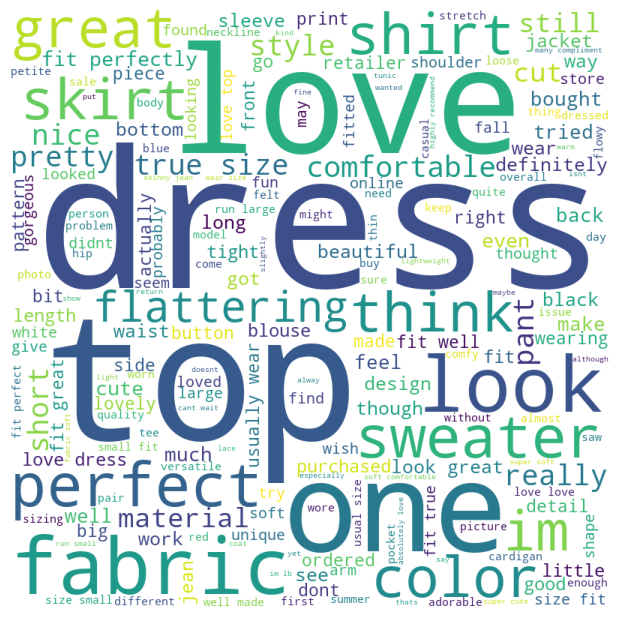

In [ ]:
stopwords = set(STOPWORDS)

wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(positive_words)

# plot the WordCloud image 
plt.figure(figsize = (6, 8), facecolor = None)
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
                       

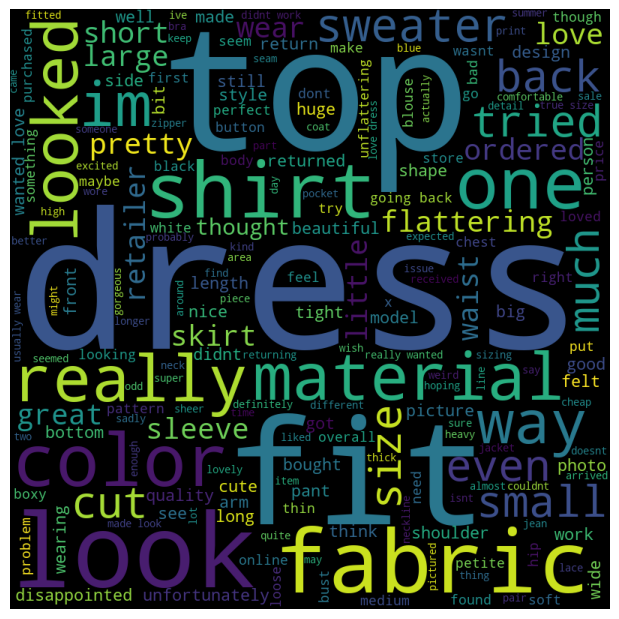

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(negative_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [228]:
df1.head()

,review_text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [229]:
from sklearn.model_selection import train_test_split

In [230]:
X = df1["review_text"].values
y = df1["label"].map({0:1, 1:0}).values # label =1 için skorlara bakılacak

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [232]:
from sklearn.feature_extraction.text import CountVectorizer

In [233]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # ngram_range=(1,3), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [234]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [235]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [31]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.29289995],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2929
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.264884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.324003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


## Model Comparisons - Vectorization

In [32]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score
from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from yellowbrick.classifier import PrecisionRecallCurve

In [33]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_confusion_matrix(model, X_test, y_test, ax=ax)

# Machine Learnings Modelings

## Logistic Regression

### CountVectorizer

In [237]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL BALANCED
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.88      0.91      3709
           1       0.59      0.83      0.69       820

    accuracy                           0.87      4529
   macro avg       0.78      0.85      0.80      4529
weighted avg       0.89      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     14831
           1       0.72      0.96      0.82      3281

    accuracy                           0.92     18112
   macro avg       0.85      0.94      0.89     18112
weighted avg       0.94      0.92      0.93     18112



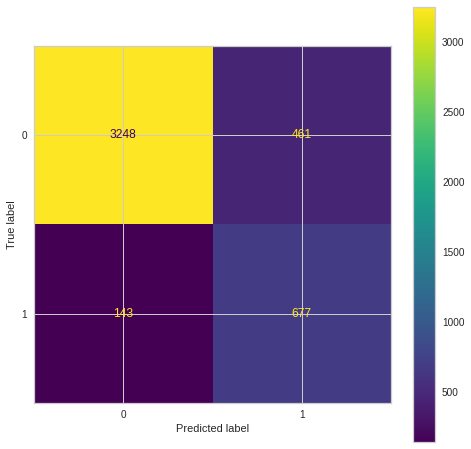

In [238]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

In [239]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, pos_label=1),
            'recall-1': make_scorer(recall_score, pos_label=1),
            'f1-1': make_scorer(f1_score, pos_label=1)}

model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.866112
test_precision-1    0.599203
test_recall-1       0.789706
test_f1-1           0.681317
dtype: float64

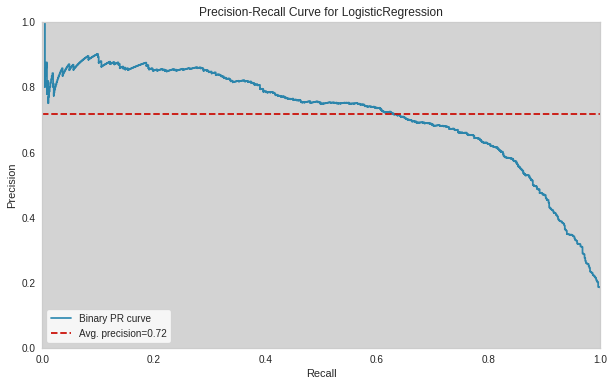

In [240]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
                            LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightgray')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [241]:
y_pred = log.predict(X_test_count)
log_count_f1 = viz.score_
log_count_rec = recall_score(y_test, y_pred)
log_AP_count = f1_score(y_test,y_pred)

### Logistic Regression With TF-IDF Vectorizer


In [38]:
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3709
           1       0.54      0.86      0.67       820

    accuracy                           0.84      4529
   macro avg       0.75      0.85      0.78      4529
weighted avg       0.89      0.84      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     14831
           1       0.57      0.89      0.69      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



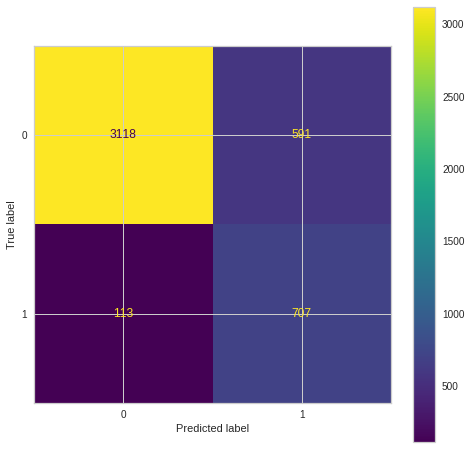

In [39]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

In [40]:
model = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy       0.846897
test_precision-1    0.549736
test_recall-1       0.856446
test_f1-1           0.669583
dtype: float64

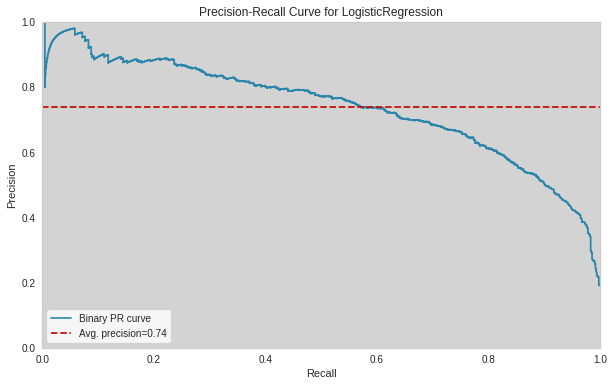

In [41]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightgray')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [42]:
y_pred = log.predict(X_test_tf_idf)
log_AP_tfidf = viz.score_
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 

### Naive Bayes With Count Vectorizor


In [43]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB()
nb.fit(X_train_count,y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3709
           1       0.65      0.77      0.71       820

    accuracy                           0.88      4529
   macro avg       0.80      0.84      0.82      4529
weighted avg       0.89      0.88      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.69      0.81      0.75      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.84     18112
weighted avg       0.91      0.90      0.90     18112



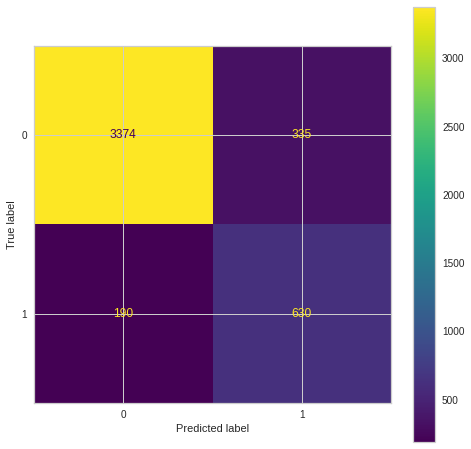

In [44]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

In [45]:
model = MultinomialNB()
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.881681
test_precision-1    0.650551
test_recall-1       0.750378
test_f1-1           0.696769
dtype: float64

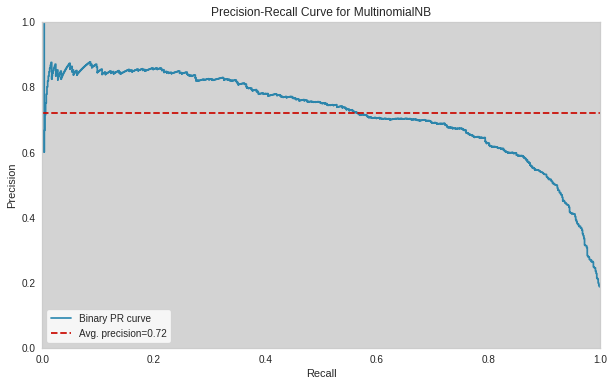

In [46]:
viz = PrecisionRecallCurve(
                            MultinomialNB(),
                            classes=nb.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightgray')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [47]:
y_pred = nb.predict(X_test_count)
nb_AP_count = viz.score_
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### Naive Bayes With TF-IDF Vectorizer

In [48]:
nb = BernoulliNB(alpha=0.6)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.6)

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3709
           1       0.65      0.75      0.70       820

    accuracy                           0.88      4529
   macro avg       0.80      0.83      0.81      4529
weighted avg       0.89      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.69      0.81      0.74      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.91      0.90      0.90     18112



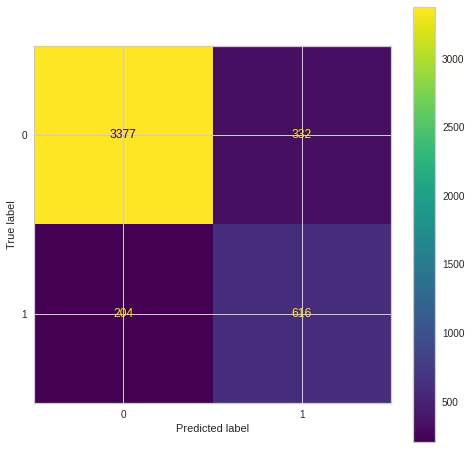

In [49]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

In [50]:
model = BernoulliNB(alpha=0.6)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.876712
test_precision-1    0.636932
test_recall-1       0.743364
test_f1-1           0.685907
dtype: float64

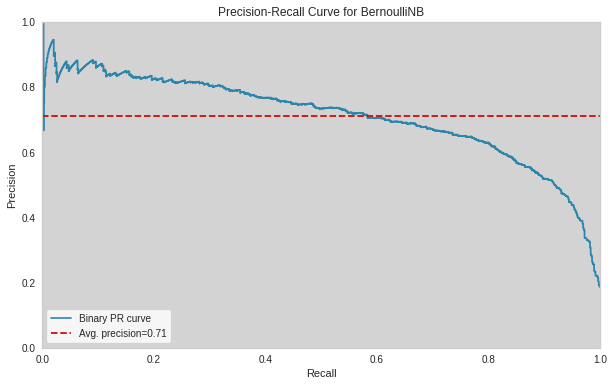

In [51]:
viz = PrecisionRecallCurve(
    BernoulliNB(alpha=0.6),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)


fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightgray')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [52]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Support Vector Machine (SVM) With Count Vectorizor

In [53]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3709
           1       0.58      0.86      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.65      0.92      0.76      3281

    accuracy                           0.90     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.90      0.90     18112



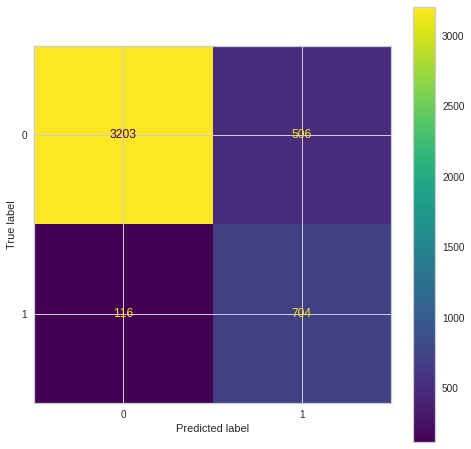

In [54]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

In [55]:
model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy       0.862965
test_precision-1    0.586640
test_recall-1       0.825975
test_f1-1           0.685942
dtype: float64

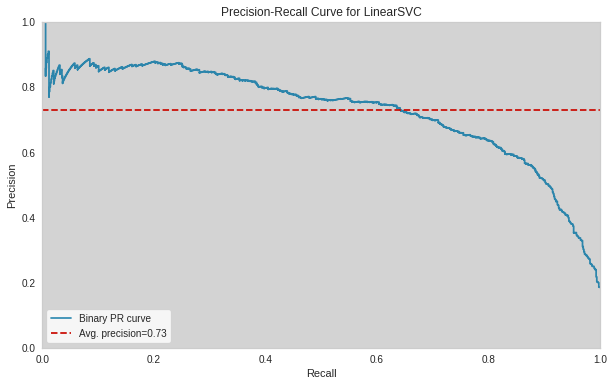

In [56]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)


fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightgray')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [57]:
y_pred = svc.predict(X_test_count)
svc_AP_count = viz.score_
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### Support Vector Machine (SVM) With TF-IDF Vectorizer

In [58]:
svc = LinearSVC(C=0.08, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.08, class_weight='balanced', random_state=101)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3709
           1       0.57      0.87      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     14831
           1       0.63      0.93      0.75      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.90      0.84     18112
weighted avg       0.92      0.89      0.90     18112



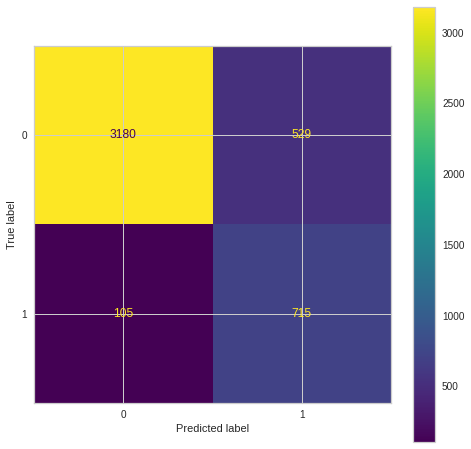

In [59]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

In [60]:
model = LinearSVC(C=0.08, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy       0.864786
test_precision-1    0.587819
test_recall-1       0.851880
test_f1-1           0.695472
dtype: float64

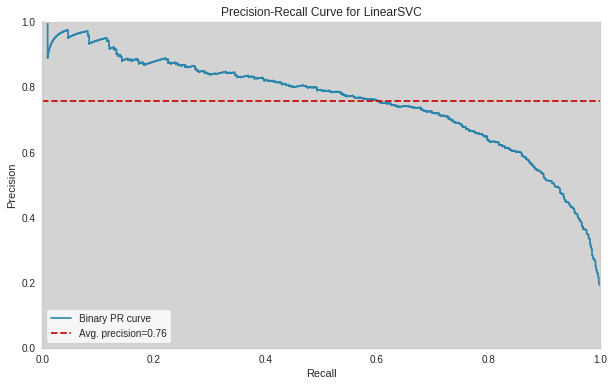

In [61]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.08, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightgray')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [62]:
y_pred = svc.predict(X_test_tf_idf)
svc_AP_tfidf = viz.score_
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

###  Random Forest With Count Vectorizer

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(200, max_depth = 20, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200,
                       n_jobs=-1, random_state=42)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3709
           1       0.61      0.72      0.66       820

    accuracy                           0.86      4529
   macro avg       0.77      0.81      0.79      4529
weighted avg       0.88      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     14831
           1       0.76      0.93      0.84      3281

    accuracy                           0.93     18112
   macro avg       0.87      0.93      0.90     18112
weighted avg       0.94      0.93      0.94     18112



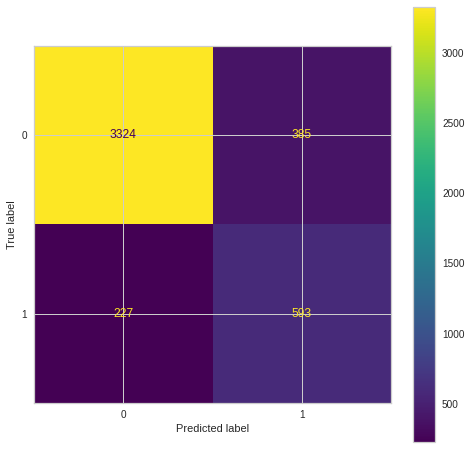

In [64]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

In [65]:
model = RandomForestClassifier(200, max_depth = 20, random_state = 42, n_jobs = -1) 
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10) 
df_scores = pd.DataFrame(scores, index = range(1, 11))

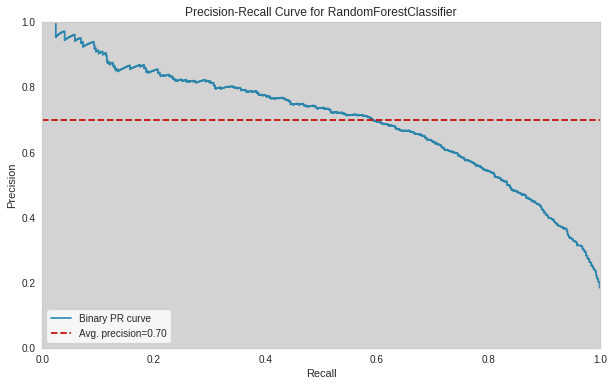

In [66]:
viz = PrecisionRecallCurve(
                            RandomForestClassifier(200, max_depth = 20, random_state = 42, n_jobs = -1, class_weight="balanced"),
                            classes=rf.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightgray')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [67]:
y_pred = rf.predict(X_test_count)
rf_AP_count = viz.score_
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### Random Forest With TF-IDF Vectorizer

In [68]:
rf = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3709
           1       0.53      0.80      0.64       820

    accuracy                           0.84      4529
   macro avg       0.74      0.82      0.77      4529
weighted avg       0.87      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     14831
           1       0.59      0.90      0.71      3281

    accuracy                           0.87     18112
   macro avg       0.78      0.88      0.81     18112
weighted avg       0.90      0.87      0.88     18112



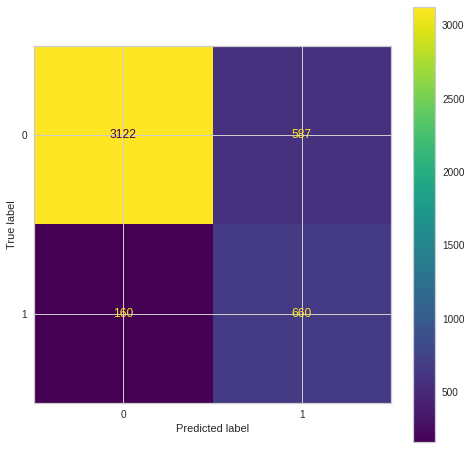

In [69]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

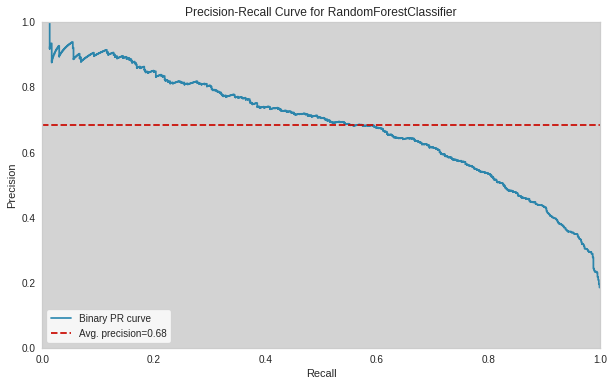

In [70]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightgray')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [71]:
y_pred = rf.predict(X_test_tf_idf)
rf_AP_tfidf = viz.score_
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [72]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
ada.fit(X_train_count, y_train)


AdaBoostClassifier(learning_rate=0.8, n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3709
           1       0.72      0.56      0.63       820

    accuracy                           0.88      4529
   macro avg       0.81      0.76      0.78      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     14831
           1       0.81      0.63      0.71      3281

    accuracy                           0.91     18112
   macro avg       0.87      0.80      0.83     18112
weighted avg       0.90      0.91      0.90     18112



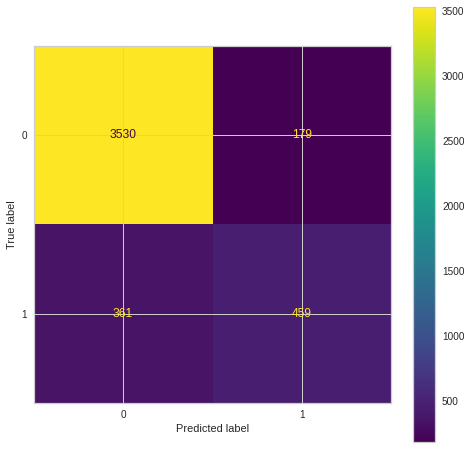

In [73]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

In [74]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy       0.879197
test_precision-1    0.717500
test_recall-1       0.550750
test_f1-1           0.622917
dtype: float64

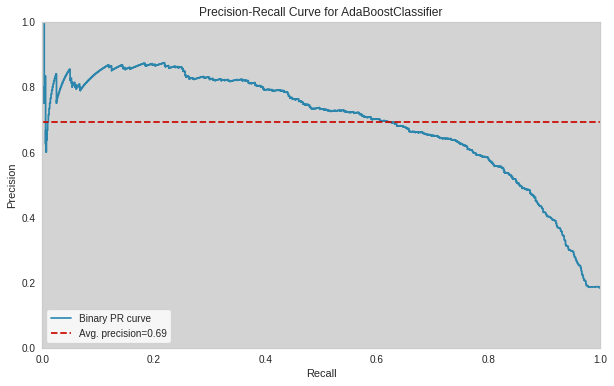

In [75]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightgray')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [76]:
y_pred = ada.predict(X_test_count)
ada_AP_count = viz.score_
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### Ada Boosting With TF-IDF Vectorizer

In [77]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3709
           1       0.70      0.56      0.62       820

    accuracy                           0.88      4529
   macro avg       0.80      0.75      0.77      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14831
           1       0.84      0.69      0.76      3281

    accuracy                           0.92     18112
   macro avg       0.89      0.83      0.86     18112
weighted avg       0.92      0.92      0.92     18112



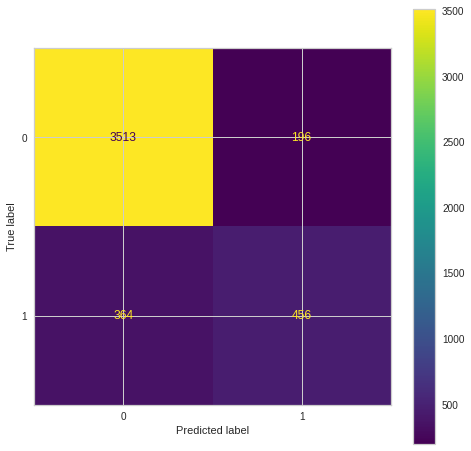

In [78]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

In [79]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy       0.877982
test_precision-1    0.709045
test_recall-1       0.555630
test_f1-1           0.622704
dtype: float64

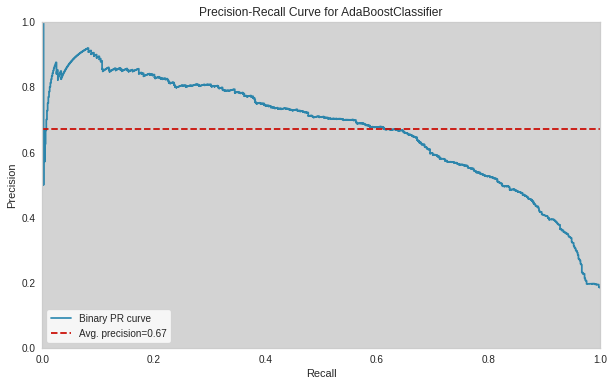

In [80]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightgray')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [81]:
y_pred = ada.predict(X_test_tf_idf)
ada_AP_tfidf = viz.score_
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [83]:
df1.head()

,review_text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [ ]:
df.shape

(23486, 11)

### Tokenization

In [84]:
num_words = 15001 # 1 fazlasını yazıyoruz. 
# corpusta en fazla geçen ilk 15.000 kelime(token), textlerin numeric versiona dönüştürülmesinde kullanılacak. Diğer tokenleri
# dönüşümde kullanmayacak. 
# None değeri atanırsa tüm kelimeler/tokenler dikkate alınır. Ancak num_words'e None atandığında DL modeline data verilirken hata 
# döndürür. Bu sebeple num_words'e herzaman integer sayı atanmalıdır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 


In [85]:
tokenizer.fit_on_texts(X)

### Creating word index

In [86]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [87]:
len(tokenizer.word_index)
# corpusumuzda toplam 14847 adet token var. 

14847

### Converting tokens to numeric

In [88]:
X_num_tokens = tokenizer.texts_to_sequences(X)

# texts_to_sequences fonksiyonu ile datamızın her bir document/satırında bulunan tüm tokenler word_index'teki kullanım sıklıklarını 
# gösteren numaralara göre dönüştürülür.

In [ ]:
X_num_tokens[:2]

# ilk iki yorumun numeric vektörlerini görüyoruz.

[[253, 532, 917, 3, 662, 3, 68],
 [21,
  7,
  18,
  33,
  1713,
  99,
  2,
  1322,
  8,
  221,
  5,
  9,
  4,
  106,
  3,
  36,
  314,
  2,
  131,
  1243,
  2,
  429,
  41,
  24,
  52,
  5,
  136,
  1243,
  33,
  95,
  2,
  72,
  4,
  95,
  3,
  38,
  501,
  2,
  21,
  1,
  86,
  11,
  31,
  416,
  39,
  4,
  53,
  454,
  1,
  392,
  41,
  155,
  29,
  4,
  130,
  1372,
  11,
  438,
  439,
  6,
  772,
  95]]

In [89]:
X[100]

"The fabric felt cheap and i didn't find it to be a flattering top. for reference i am wearing a medium in the photos and my measurements are 38-30-40."

In [90]:
print(X_num_tokens[100])

# 100'ünci indexdeki yorum aşağıdaki gibi numeric versiyona dönüştürüldü.

[1, 45, 267, 489, 3, 2, 124, 221, 5, 8, 29, 4, 58, 25, 12, 330, 2, 38, 141, 4, 97, 9, 1, 451, 3, 17, 1506, 27, 920, 691, 927]


### Maximum number of tokens for all documents¶

In [91]:
len(X_num_tokens[100])

31

In [92]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [93]:
num_tokens.mean()

60.60699615741354

In [94]:
num_tokens.max()

116

In [95]:
num_tokens.argmax()

16263

In [ ]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [96]:
max_tokens = 116

In [97]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [98]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [99]:
X_pad.shape

(22641, 116)

In [100]:
np.array(X_num_tokens[500])

array([   2,  171,  196,    7,  170,  931,   44,    1,  106,    3,    5,
        124,   48,   23,   69,    2,  196,    5,  498,   11,  158,   16,
          2,  341,    8,  179,    5,   11,   36,   16,  314,    2,  131,
          1,  672,  462,   83,    6,   16,   61,    2,   24,  652,  200,
          3,    7,  170,  131,   19, 8659,   17,  194,   44,   75,    5,
          6,   23,   68,    2,   72,    1, 1207,   46,    3,   15,   23,
        531,   44,  167,  542,    5,   15,    1,  135,   27,    4,  507,
         77,   90,   10,    1,  462, 1524,  420,   89,   60,  601, 1197,
         16,    5,   66,   29, 2309,   43,   19,  224,   49,    1, 5773,
         46, 1126,  166,   35,   46,   37,   49,    1])

In [101]:
X_pad[500]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    2,  171,
        196,    7,  170,  931,   44,    1,  106,    3,    5,  124,   48,
         23,   69,    2,  196,    5,  498,   11,  158,   16,    2,  341,
          8,  179,    5,   11,   36,   16,  314,    2,  131,    1,  672,
        462,   83,    6,   16,   61,    2,   24,  652,  200,    3,    7,
        170,  131,   19, 8659,   17,  194,   44,   75,    5,    6,   23,
         68,    2,   72,    1, 1207,   46,    3,   15,   23,  531,   44,
        167,  542,    5,   15,    1,  135,   27,    4,  507,   77,   90,
         10,    1,  462, 1524,  420,   89,   60,  601, 1197,   16,    5,
         66,   29, 2309,   43,   19,  224,   49,    1, 5773,   46, 1126,
        166,   35,   46,   37,   49,    1], dtype=int32)

In [102]:
np.array(X_num_tokens[15213])


array([ 73,  18, 590,  13, 210,  55, 849,  59, 105, 138,   8, 172])

In [103]:
X_pad[15213]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        73,  18, 590,  13, 210,  55, 849,  59, 105, 138,   8, 172],
      dtype=int32)

### Train Set Split

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=101)

### Modeling

In [106]:
model = Sequential()

In [107]:
embedding_size = 50

In [108]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))


model.add(GRU(units=48, return_sequences=True))
#model.add(Dropout(0.5))
#model.add(GRU(units=24, return_sequences=True))
#model.add(Dropout(0.5))
model.add(GRU(units=24))
model.add(Dense(1, activation='sigmoid'))

In [110]:
optimizer = Adam(learning_rate=0.001)

In [111]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [112]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750050    
                                                                 
 gru (GRU)                   (None, 116, 48)           14400     
                                                                 
 gru_1 (GRU)                 (None, 24)                5328      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 769,803
Trainable params: 769,803
Non-trainable params: 0
_________________________________________________________________


In [113]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose=1, patience = 2, restore_best_weights=True)

In [114]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()


array([2.76022758, 0.61060833])

In [115]:
model.fit(X_train, y_train, epochs=25, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
160/160 [==============================] - 28s 124ms/step - loss: 0.5003 - recall: 0.7838 - val_loss: 0.2989 - val_recall: 0.7854
Epoch 2/25
160/160 [==============================] - 11s 67ms/step - loss: 0.2893 - recall: 0.9114 - val_loss: 0.2711 - val_recall: 0.7659
Epoch 3/25
160/160 [==============================] - 9s 55ms/step - loss: 0.2251 - recall: 0.9412 - val_loss: 0.3863 - val_recall: 0.8854
Epoch 4/25
160/160 [==============================] - 4s 22ms/step - loss: 0.1931 - recall: 0.9531 - val_loss: 0.3294 - val_recall: 0.8122
Epoch 5/25
160/160 [==============================] - 3s 22ms/step - loss: 0.1594 - recall: 0.9672 - val_loss: 0.3706 - val_recall: 0.8293
Epoch 5: early stopping


### Model evaluation

In [116]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.500267,0.783798,0.298937,0.785366
1,0.289348,0.911406,0.271079,0.765854
2,0.225116,0.941208,0.386278,0.885366
3,0.193057,0.953129,0.329352,0.812195
4,0.159410,0.967218,0.370558,0.829268


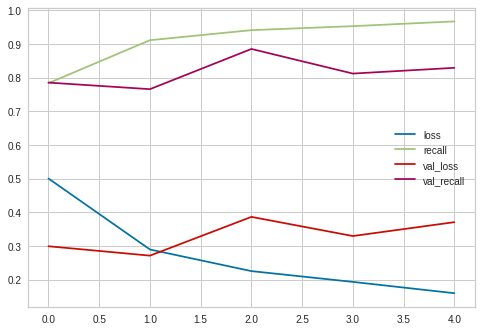

In [117]:
model_loss.plot()

In [118]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 4s 5ms/step
[[14485  2200]
 [   40  3651]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     16685
           1       0.62      0.99      0.77      3691

    accuracy                           0.89     20376
   macro avg       0.81      0.93      0.85     20376
weighted avg       0.93      0.89      0.90     20376



In [119]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

71/71 [==============================] - 0s 5ms/step
[[1544  311]
 [  47  363]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1855
           1       0.54      0.89      0.67       410

    accuracy                           0.84      2265
   macro avg       0.75      0.86      0.78      2265
weighted avg       0.89      0.84      0.86      2265



In [120]:
from sklearn.metrics import precision_recall_curve, average_precision_score

71/71 [==============================] - 0s 5ms/step


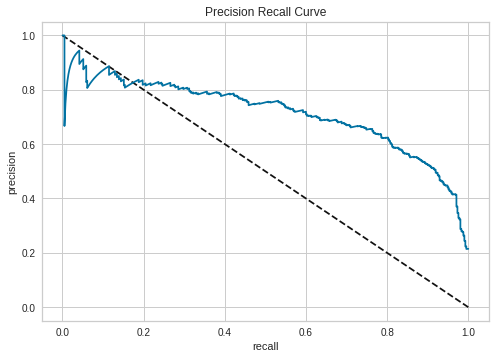

In [121]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [122]:
average_precision_score(y_test, y_pred_proba)

0.7154453949675524

In [123]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [134]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 101.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 95.6 MB/s eta 0:00:00


### Read Data

In [167]:
df1.head()

,review_text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [170]:
X = df1['review_text'].values
y = df1['label'].map({1:0, 0:1}).values # hedef labelımızı 1 yapıyoruz.

### Train test split

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

### Tokenization

In [156]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

### Fixing token counts of all documents

In [172]:
max_len = 0

# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent.lower(), add_special_tokens=True)
    max_token.append(len(input_ids))

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  162


In [173]:
np.array(max_token).mean()

76.75659202332052

In [174]:
sum(np.array(max_token) <= 162) / len(max_token)

1.0

### Transformation Vectors to Matrices

In [175]:
# Elimizde tek bir yorum/text varken BERT modelleri 3 ayrı vektör (classificaiton problemleri için 2 ayrı vektör) olarak textin numeric versiona dönüştürülmesini
# ister. Ancak birden fazla yorum varsa artık olayın boyutu değişir. Ve vektörlerin biraraya gelmesiyle oluşan matrixler isterler.
# Problemimiz classification olduğundan token embeddings (input_ids), position embeddings (attention_mask) vektörlerinden oluşan 2 ayrı matrix elde etmemiz gerekiyor.
# Bunun için öncelikle input_ids ve attention_mask için boş listeler oluşturup for döngüsüyle X'den tüm yorumları sırayla çekip bu yorumlardan elde ettiğimiz input_ids,
# attention_mask vektörlerini boş listeler içine append edip son aşamada bu listeleri array() fonksiyonu ile  (satır sayısı, sabitlediğimiz token sayısı) --> (len(X), 160) 
# boyutunda matrixlere dönüştürüyoruz.

def transformation(X):
  # set array dimensions
  seq_len = 162

  # input_ids'ler için Xids boş listesini, attention_mask'ler için Xmask boş listesini oluşturuyoruz.
  Xids = []
  Xmask = []

    
  for sentence in X: # corpustan tüm yorumları sırayla çekiyoruz.

      tokens = tokenizer.encode_plus(sentence, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      # çektiğimiz herbir yorumu(sentence) vektörlere dönüştürüyoruz.
      
      # assign tokenized outputs to respective rows in numpy arrays
      Xids.append(tokens['input_ids']) # her bir yoruma karşılık gelen input_ids vektörünü Xids listesine append ediyoruz.
      Xmask.append(tokens['attention_mask']) # her bir yoruma karşılık gelen attention_mask vektörünü Xmask append ediyoruz.

  return np.array(Xids), np.array(Xmask) # Xids ve Xmask listelerini np.array ile (yorum sayısı, 160) boyutlarında matrixlere dönüştürüyoruz.


In [176]:
Xids_train, Xmask_train = transformation(X_train)

# Train setimiz için 2 ayrı matriximizi düzenliyoruz.

Xids_test, Xmask_test = transformation(X_test)
# Test setimiz için de 2 ayrı matriximizi düzenliyoruz.

In [177]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20376, 162)
Xmask_train.shape : (20376, 162)
Xids_test.shape   : (2265, 162)
Xmask_test.shape  : (2265, 162)


In [178]:
Xids_train

array([[ 101, 2025, 4257, ...,    0,    0,    0],
       [ 101, 1045, 2001, ...,    0,    0,    0],
       [ 101, 1045, 2387, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 2307, 4906, ...,    0,    0,    0],
       [ 101, 2043, 1045, ...,    0,    0,    0]])

In [179]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [180]:
labels_train = y_train.reshape(-1,1)
labels_train

# BERT modelleri target'ı da bir matrix olarak ister. Bu sebeple y_train targetımızı (len(y_train), 1) boyutunda bir matrix'e dönüştürüyoruz.

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [181]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [182]:
labels_test = y_test.reshape(-1,1)
labels_test

# BERT modelleri target'ı da bir matrix olarak ister. Bu sebeple y_train targetımızı (len(y_train), 1) boyutunda bir matrix'e dönüştürüyoruz.

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [183]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

# Datayı BERT modellerine vermeden önceki son aşama yukarıda elde ettiğimiz matrixleri gruplandırılmış Tensorflow tensörlerine dönüştürmektir.
# Bir tensor, bir veya daha fazla boyutta veri topluluğunu ifade eden bir matematiksel yapıdır. Tek boyutlu tensör vektör olarak, 2 boyutlu tensör matrix olarak, 
# 3 ve daha büyük boyuttaki tensörler ise yüksek boyutlu tensörler olarak ifade edilir.

# Tensorflow  tensörleri GPU/TPU gibi donanımların daha hızlı çalışmasını veya paralel işleme gibi işlemlerin daha effektif yapılmasını sağlar. 
# TensorFlow tensörleri, TensorFlow kütüphanesi tarafından sağlanan otomatik türev alma özelliklerini de kullanabilir. Ancak numpy.array() bu işlemleri sağlayamadığı 
# için Tesorflow kütüphanesi ile Tensörlere dönüştürüyoruz.

# Ayrıca, tf.data.Dataset.from_tensor_slices fonksiyonu, Xids_train, Xmask_train, labels_train tensörlerinin 3'ünü gruplar haline getirir. Model böylece bu 3 tensörün
# aynı veriyi temsil ettiğini anlayacaktır.

# Bu kapsamda, train datası için yukarıda elde ettiğimiz 3 ayrı matrix'mizi de gruplandırılmış Tensorflow tensörlerine dönüştüreceğiz. 

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [184]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

# Train datasına yaptığımız gibi test datası için de 3 ayrı matrix'mizi gruplandırılmış Tensorflow tensörlerine dönüştüreceğiz.

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [185]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels
  
# Yukarıda elde ettiğimiz tensörlerden hangisi 'input_ids' hangisi 'attention_mask' ve hangisi labels model bunları bilemez. Bu sebeple
# bu bilgiyi bizim modele sağlamamız gerekiyor. Bunun için yukarıdaki fonksiyonu tanımlıyoruz.
# süslü parantez içerisine 'input_ids' ve  'attention_mask' tanımlamamızı yapıyoruz. Labels'ı süslü parantez dışarısında bırakıyoruz.

In [186]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func) 

# yukarıda tanımladığımız fonksiyonu map ile tüm train ve test datasına uyguluyoruz.
# dataset_train.map(map_func) ve dataset_test.map(map_func) şeklinde de dönüşümler yapılır. 

In [187]:
dataset_train

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [188]:
dataset_test

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [190]:
batch_size = 32

# BERT modeli geliştiren developerlar tarafından batch_size olarak 16 ve 32 sayıları tavsiye edilmiştir.

# batch_size 
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

# Yukarıda elde ettiğimiz gruplandırılmış tensörleri kaçarlı paketler halinde modele vereceğimizi belirliyoruz. Bu işlemi batch() fonksiyonu ile yapıyoruz.
# 32'li paketler halinde modele verilmesini istiyoruz. hem train hem de test datasına uyguluyoruz.

In [191]:
train_ds

<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 162), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 162), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

### Creating optimization

In [197]:
!pip install -q tf-models-official

In [193]:
from official.nlp import optimization
epochs = 1
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')  

### Creating Model

In [194]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(162, activation='relu')(embeddings)
    x = tf.keras.layers.Dropout(0.1, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [202]:
strategy = tf.distribute.MirroredStrategy()

In [203]:
with strategy.scope():

  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  
  optimizer = optimizer
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [204]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

### Model Fiting

In [205]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs)

637/637 [==============================] - 776s 1s/step - loss: 0.2518 - recall: 0.6846 - val_loss: 0.1800 - val_recall: 0.7561


### Model evaluation

In [208]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test, y_pred))

71/71 [==============================] - 36s 392ms/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1855
           1       0.79      0.76      0.77       410

    accuracy                           0.92      2265
   macro avg       0.87      0.86      0.86      2265
weighted avg       0.92      0.92      0.92      2265



In [213]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train, y_train_pred)) 

# train datasının scorları için karılmamış train_ds datasını kullanıyoruz.

637/637 [==============================] - 240s 375ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     16685
           1       0.83      0.84      0.84      3691

    accuracy                           0.94     20376
   macro avg       0.90      0.90      0.90     20376
weighted avg       0.94      0.94      0.94     20376



71/71 [==============================] - 27s 380ms/step


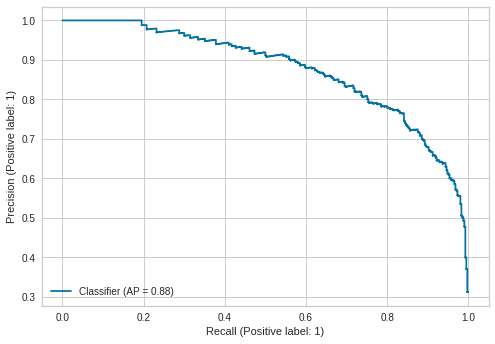

In [214]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [215]:
average_precision_score(y_test, y_pred_proba)

0.8753528853902345

In [216]:
BERT_without_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test, y_pred)
BERT_without_weighted_rec = recall_score(y_test, y_pred)

# BERT Model with Weighted

In [217]:
pd.Series(y).value_counts(normalize=True)

0    0.818868
1    0.181132
dtype: float64

In [218]:
weights = {0:0.2, 1:0.8}

In [219]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs, class_weight=weights)

637/637 [==============================] - 738s 1s/step - loss: 0.0852 - recall: 0.8060 - val_loss: 0.1800 - val_recall: 0.7561


In [220]:
y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

71/71 [==============================] - 28s 387ms/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1855
           1       0.79      0.76      0.77       410

    accuracy                           0.92      2265
   macro avg       0.87      0.86      0.86      2265
weighted avg       0.92      0.92      0.92      2265



In [221]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred)) 

637/637 [==============================] - 238s 373ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     16685
           1       0.83      0.84      0.84      3691

    accuracy                           0.94     20376
   macro avg       0.90      0.90      0.90     20376
weighted avg       0.94      0.94      0.94     20376



In [222]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test, y_pred_proba)

71/71 [==============================] - 28s 387ms/step


0.8753528853902345

In [223]:
BERT_with_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test, y_pred)
BERT_with_weighted_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

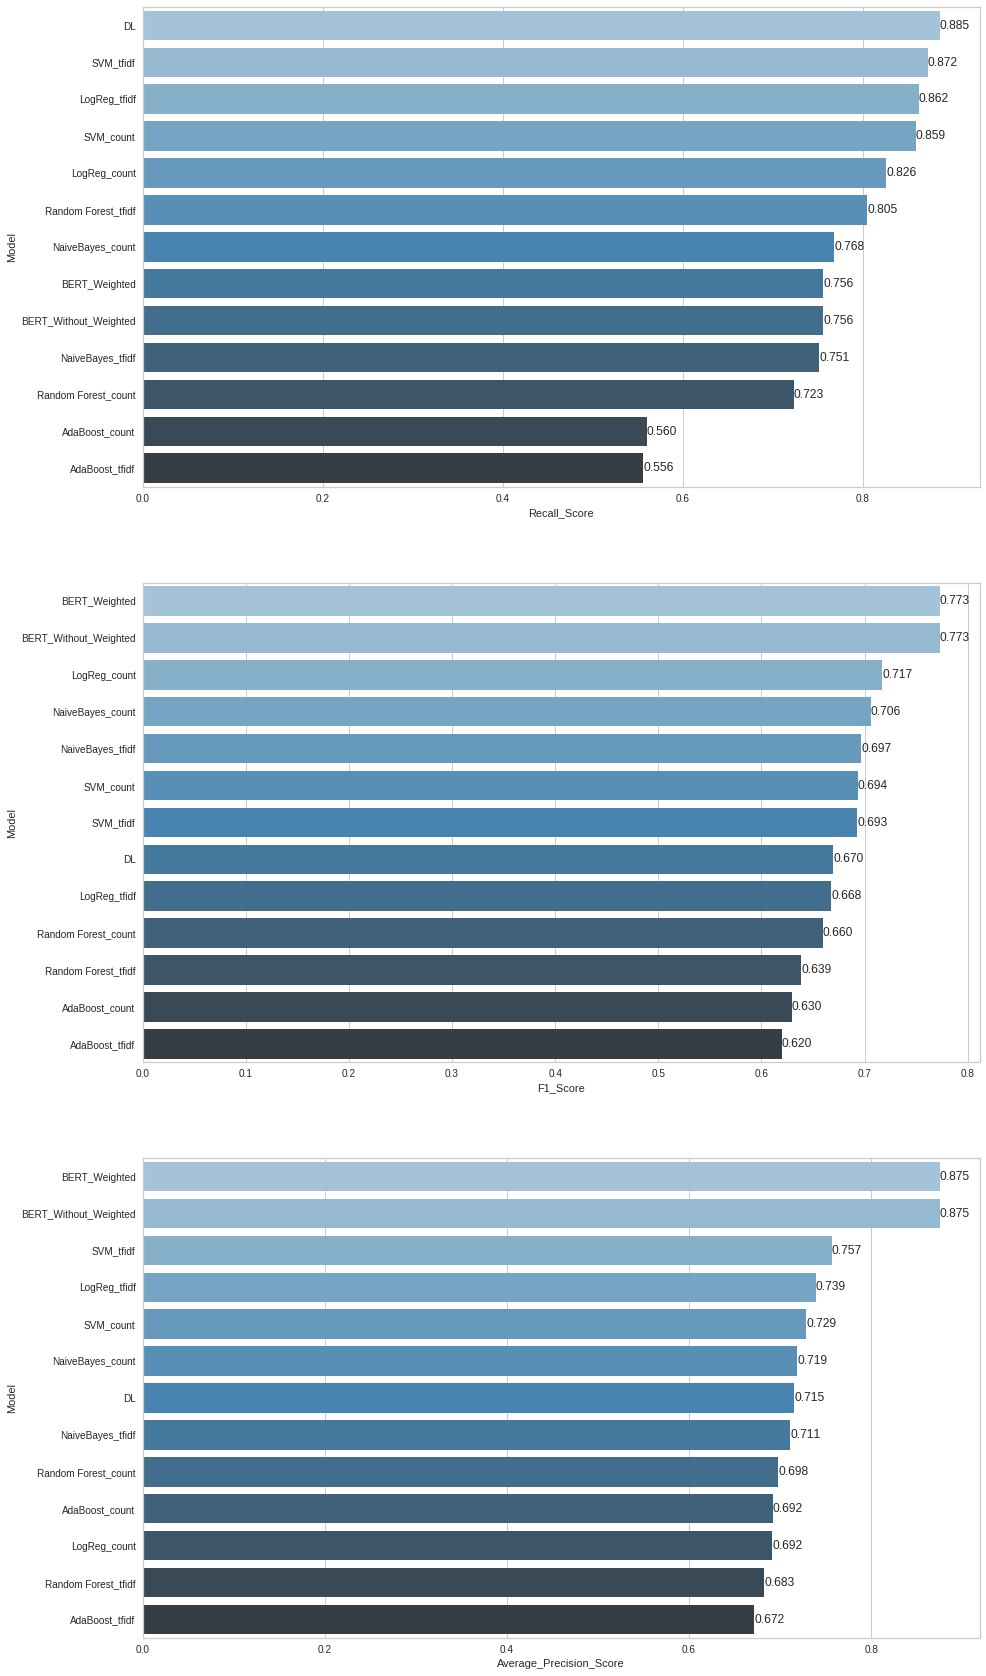

In [242]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1, BERT_without_weighted_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec, BERT_without_weighted_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP, BERT_without_weighted_AP]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();
